Digital Toolbox for Façade Acoustics and Soundscape Assessment: Visualization of Questionnaire Data
# Alvaro Balderrama Chiappe
231026

Soundscape assessment methods such as soundwalks where participants fill in a questionnaire while the sound levels are measured with a sound level meter (SLM) can be used to study how people perceive the acoustic environment in a city. Analyzing the data obtained from a soundwalk is an important process that might influence the results and interpretation of an experiment if executed more or less effectively. This Jupyter Notebook was created help solve some challenges of visualizing soundscape data collected based on Method A of ISO/TS 12913-2:2018.

Contents:

1. Questionnaire Part 1: Sound perception (answered in every area)

            1.1. Plot Sound Source Identification
            1.2. Plot Soundscape Radar Plot
            1.3. Plot Soundscape Scatter Plot (visualization style 1 and 2)
            1.4. Plot perceived loudness, Appropriatenes, Sound Quality, Visual Quality
            1.5. Plot SPL and perceived loudness
2. Questionnaire Part 2: Sociodemographic data (answered after the soundwalk)

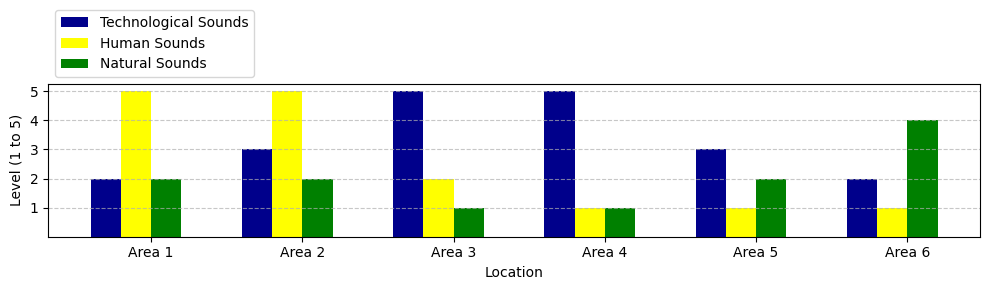

In [1]:
# 1.1. Plot Sound Source Identification
# Alvaro Balderrama Chiappe
231026

import matplotlib.pyplot as plt
import numpy as np

# Define the categories and their corresponding values for three parameters
categories = ['Area 1', 'Area 2', 'Area 3', 'Area 4', 'Area 5', 'Area 6']

technological_sounds = [2, 3, 5, 5, 3, 2]
human_sounds = [5, 5, 2, 1, 1, 1]
natural_sounds = [2, 2, 1, 1, 2, 4]

# Set the width of each bar
bar_width = 0.2

# Create an array of equally spaced values for x-axis positioning
x = np.arange(len(categories))

# Define custom colors for the parameters
colors = ['darkblue', 'yellow', 'green']

# Create the bar graph with custom colors
plt.figure(figsize=(10, 3))  # Set the figure size

# Plot each parameter as a group of bars with custom colors
plt.bar(x - 1.5 * bar_width, technological_sounds, width=bar_width, label='Technological Sounds', color=colors[0])
plt.bar(x - 0.5 * bar_width, human_sounds, width=bar_width, label='Human Sounds', color=colors[1])
plt.bar(x + 0.5 * bar_width, natural_sounds, width=bar_width, label='Natural Sounds', color=colors[2])

# Customize the plot
# plt.title('Sound Source Identification in Different Areas')
plt.xlabel('Location')
plt.ylabel('Level (1 to 5)')
plt.legend()  # Show the legend with labels for each parameter
plt.xticks(x, categories)  # Set x-axis labels to match the categories

# Set y-axis ticks to display values from 1 to 5
plt.yticks([1, 2, 3, 4, 5])

# Move the legend to the lower left, outside the plot
plt.legend(loc='lower left', bbox_to_anchor=(0, 1))

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()  # Adjust the layout for better appearance
plt.show()


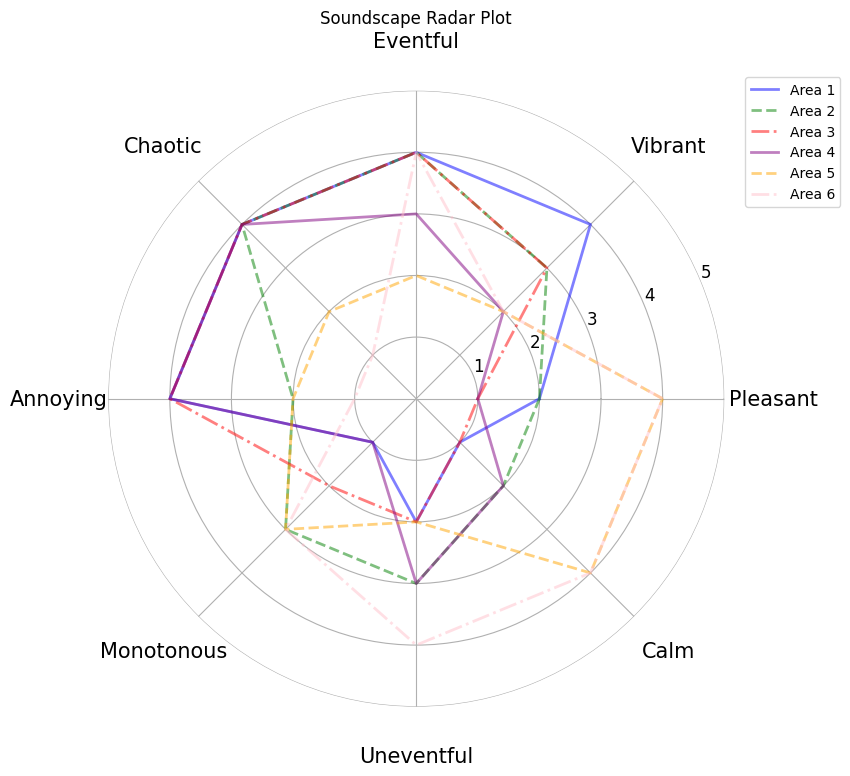

In [2]:
# 1.2. Print Soundscape Radar Plot 
# Alvaro Balderrama Chiappe
231026

import matplotlib.pyplot as plt
import numpy as np

# Define categories and their values for 6 different visits
categories = ['Pleasant', 'Vibrant', 'Eventful', 'Chaotic', 'Annoying', 'Monotonous', 'Uneventful', 'Calm']

#                p  v  e  ch a  m  u  ca
visit1_values = [2, 4, 4, 4, 4, 1, 2, 1]
visit2_values = [2, 3, 4, 4, 2, 3, 3, 2]
visit3_values = [1, 3, 4, 4, 4, 2, 2, 1]
visit4_values = [1, 2, 3, 4, 4, 1, 3, 2]
visit5_values = [4, 2, 2, 2, 2, 3, 2, 4]
visit6_values = [4, 2, 4, 1, 1, 3, 4, 4]

# Ensure all lists have the same length
assert len(categories) == len(visit1_values) == len(visit2_values) == len(visit3_values) == len(visit4_values) == len(visit5_values) == len(visit6_values)

# Create a radar plot with labels
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})

# Define angles for the categories (dividing the circle into 6 equal parts)
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

# Plot the radar plot for each visit with different line styles and colors
ax.plot(angles, visit1_values + [visit1_values[0]], linestyle='-', linewidth=2, color='blue', label='Area 1', alpha=0.5)
ax.plot(angles, visit2_values + [visit2_values[0]], linestyle='--', linewidth=2, color='green', label='Area 2', alpha=0.5)
ax.plot(angles, visit3_values + [visit3_values[0]], linestyle='-.', linewidth=2, color='red', label='Area 3', alpha=0.5)
ax.plot(angles, visit4_values + [visit4_values[0]], linestyle='-', linewidth=2, color='purple', label='Area 4', alpha=0.5)
ax.plot(angles, visit5_values + [visit5_values[0]], linestyle='--', linewidth=2, color='orange', label='Area 5', alpha=0.5)
ax.plot(angles, visit6_values + [visit6_values[0]], linestyle='-.', linewidth=2, color='pink', label='Area 6', alpha=0.5)

# Customize the plot
plt.yticks([1, 2, 3, 4, 5], ['1', '2', '3', '4', '5'], fontsize=12)  # Increase y-axis label font size
plt.xticks(angles[:-1], categories, fontsize=15)  # Increase x-axis label font size

# Remove the circular border by setting the axis line color to transparent
ax.spines['polar'].set_color('none')

# Add more space for the labels
ax.tick_params(axis='x', pad=25)  # Adjust the label distance from the plot

plt.title('Soundscape Radar Plot')

# Show the plot with the legend in the lower right corner, pushed to the right
plt.legend(loc='lower right', bbox_to_anchor=(1.2, 0.8))
plt.show()


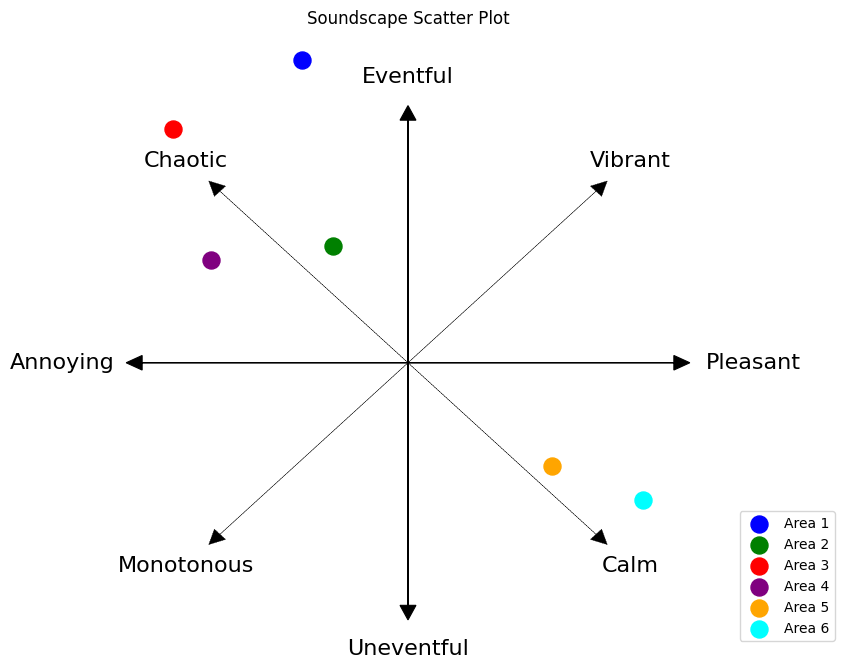

In [3]:
# 1.3. Print Soundscape Scatter Plot - Visualization style 1 (ISO 12913-3:2019)
# Alvaro Balderrama Chiappe
231026


import matplotlib.pyplot as plt
import numpy as np

# Function to calculate P and E coordinates
def calculate_coordinates(p, ca, ch, e, m, a, u, v):
    P = (p - a) + np.cos(np.deg2rad(45)) * (ca - ch) + np.cos(np.deg2rad(45)) * (v - m)
    E = (e - u) + np.cos(np.deg2rad(45)) * (ch - ca) + np.cos(np.deg2rad(45)) * (v - m)
    return P, E

# Input PAQ values for 6 locations
locations = {
#              p  v  e  ch a  m  u  ca
    'Area 1': (2, 1, 4, 4, 1, 4, 2, 4),
    'Area 2': (2, 2, 4, 4, 3, 2, 3, 3),
    'Area 3': (1, 1, 4, 4, 2, 4, 2, 3),
    'Area 4': (1, 2, 4, 3, 1, 4, 3, 2),
    'Area 5': (4, 4, 2, 2, 3, 2, 2, 2),
    'Area 6': (4, 4, 1, 4, 3, 1, 4, 2),
}

# Labels for the arrows
arrow_labels = ['Pleasant', 'Vibrant', 'Eventful', 'Chaotic', 'Annoying', 'Monotonous', 'Uneventful', 'Calm']

# Colors for different locations
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

# Initialize lists to store P and E coordinates for each location
P_values = []
E_values = []

# Create a scatter plot for all locations
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed

# Add arrows representing the eight directions with larger arrowheads
for angle in range(0, 360, 45):
    dx = 5 * np.cos(np.deg2rad(angle))
    dy = 5 * np.sin(np.deg2rad(angle))
    
    # Set thinner line width for diagonals and make them dashed
    lw = 0.3 if angle % 90 == 45 else 0.8
    linestyle = '--' if angle % 90 == 45 else '-'
    
    plt.arrow(0, 0, dx, dy, head_width=0.3, head_length=0.3, fc='black', ec='black', lw=lw, linestyle=linestyle)

# Plot the scattered points for the locations with different colors and larger points
for i, (location, values) in enumerate(locations.items()):
    p, ca, ch, e, m, a, u, v = values
    P, E = calculate_coordinates(p, ca, ch, e, m, a, u, v)
    
    plt.scatter(P, E, s=150, marker='o', color=colors[i], label=location)

    # Append P and E values to the lists
    P_values.append(P)
    E_values.append(E)

# Add labels at the end of each arrowhead with larger fontsize
for i, label in enumerate(arrow_labels):
    angle = i * 45
    offset = 1.5 if label in ['Pleasant', 'Annoying'] else 0.9
    dx = (5 + offset) * np.cos(np.deg2rad(angle))
    dy = (5 + offset) * np.sin(np.deg2rad(angle))
    plt.text(dx, dy, label, ha='center', va='center', fontsize=16)

# Set the background color to white
plt.gca().set_facecolor('white')

# Hide the x and y ticks
plt.xticks([])
plt.yticks([])

# Remove the frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# legend
plt.legend(loc='lower right', bbox_to_anchor=(1.2, 0))
plt.title('Soundscape Scatter Plot')
plt.show()


C:\Users\alvar\AppData\Local\Temp\ipykernel_23420\6794446.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([-5, 5], [-5, 5], 'k--', linewidth=0.5, color='grey')
C:\Users\alvar\AppData\Local\Temp\ipykernel_23420\6794446.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([-5, 5], [5, -5], 'k--', linewidth=0.5, color='grey')


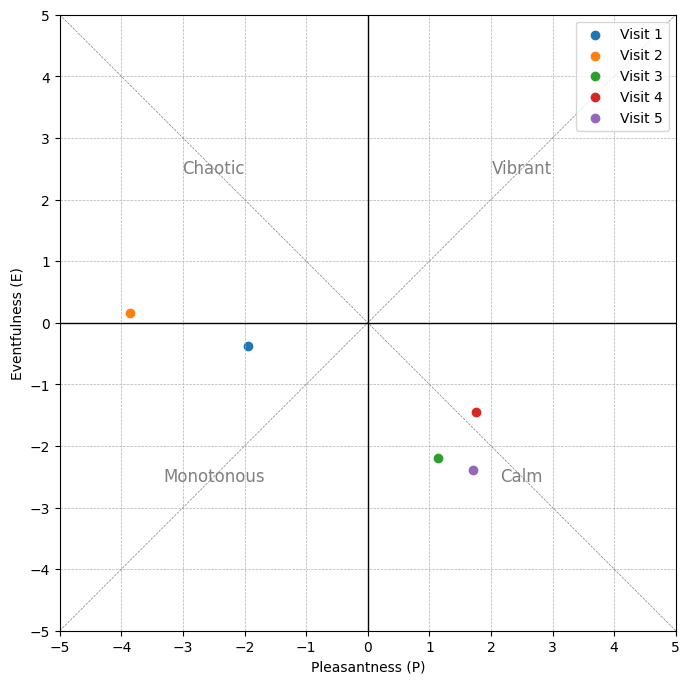

In [9]:
# 1.3. Print Soundscape Scatter Plot - Visualization style 2 (Grid scatter plot)
# Alvaro Balderrama Chiappe
231026

import matplotlib.pyplot as plt
import numpy as np

# Function to calculate P and E coordinates
def calculate_coordinates(p, ca, ch, e, m, a, u, v):
    P = (p - a) + np.cos(np.deg2rad(45)) * (ca - ch) + np.cos(np.deg2rad(45)) * (v - m)
    E = (e - u) + np.cos(np.deg2rad(45)) * (ch - ca) + np.cos(np.deg2rad(45)) * (v - m)
    return P, E

# Input PAQ values for 5 locations
locations = {
    'Visit 1': (3.7, 2.9, 4.0, 1.7, 4.3, 3.8, 1.8, 2.8),
    'Visit 2': (1.0, 3.1, 4.8, 2.0, 2.5, 4.5, 3.9, 3.7),
    'Visit 3': (3.5, 3.0, 1.2, 1.5, 2.2, 4.9, 3.7, 4.0),
    'Visit 4': (4.2, 2.8, 1.1, 2.3, 2.4, 4.7, 3.6, 3.9),
    'Visit 5': (3.9, 3.2, 1.3, 1.8, 2.1, 4.6, 3.9, 3.6)
}

# Normalize data toggle (YES or NO)
normalize_data = False # Change to False to use -5 to 5 scale

# Initialize lists to store P and E coordinates for each location
P_values = []
E_values = []

for location, values in locations.items():
    # Extract PAQ values for the current location
    p, ca, ch, e, m, a, u, v = values

    if normalize_data:
        # Normalize values from 1 to -1
        p, ca, ch, e, m, a, u, v = [(x - 1) / 4 for x in (p, ca, ch, e, m, a, u, v)]

    # Calculate P and E coordinates for the current location
    P, E = calculate_coordinates(p, ca, ch, e, m, a, u, v)
   
    # Append P and E values to the lists
    P_values.append(P)
    E_values.append(E)

# Create a scatter plot for all locations
plt.figure(figsize=(8, 8))
for i, location in enumerate(locations.keys()):
    plt.scatter(P_values[i], E_values[i], marker='o', label=location)

# Add text labels to each quadrant within the grid (center-aligned)
plt.text(-2.5, 2.5, 'Chaotic', color='grey', fontsize=12, ha='center', va='center')
plt.text(2.5, 2.5, 'Vibrant', color='grey', fontsize=12, ha='center', va='center')
plt.text(-2.5, -2.5, 'Monotonous', color='grey', fontsize=12, ha='center', va='center')
plt.text(2.5, -2.5, 'Calm', color='grey', fontsize=12, ha='center', va='center')

# Add diagonal dashed lines manually (gray and thin)
plt.plot([-5, 5], [-5, 5], 'k--', linewidth=0.5, color='grey')
plt.plot([-5, 5], [5, -5], 'k--', linewidth=0.5, color='grey')

# Add stronger lines on the x and y axes
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xticks(np.arange(-1, 1.1, 0.2) if normalize_data else np.arange(-5, 5.1, 1))
plt.yticks(np.arange(-1, 1.1, 0.2) if normalize_data else np.arange(-5, 5.1, 1))
plt.xlabel('Pleasantness (P)')
plt.ylabel('Eventfulness (E)')
#plt.title('Soundscape Scatter Plot')
plt.gca().set_aspect('equal')

# Show the legend
plt.legend()
plt.show()


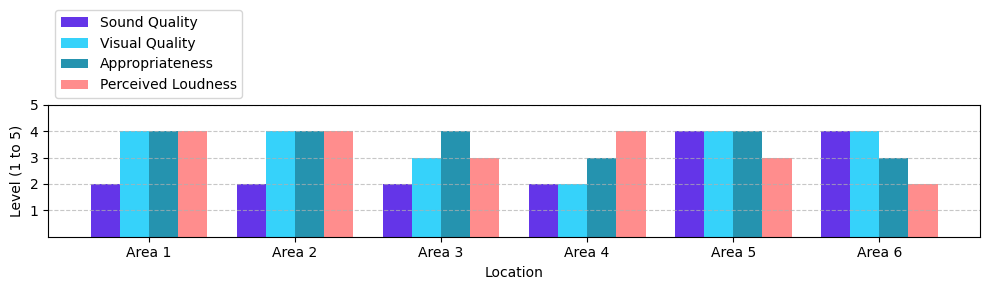

In [5]:
# 1.4. Plot Sound quality, visual quality, appropriateness, perceived loudness
# Alvaro Balderrama Chiappe
231026

import matplotlib.pyplot as plt
import numpy as np

# Define the visits and the parameter values (perceived loudness, appropriateness, sound quality, visual quality)
locations = ['Area 1', 'Area 2', 'Area 3', 'Area 4', 'Area 5', 'Area 6']

sound_quality = [2, 2, 2, 2, 4, 4]
visual_quality = [4, 4, 3, 2, 4, 4]
appropriateness = [4, 4, 4, 3, 4, 3]
perceived_loudness = [4, 4, 3, 4, 3, 2]

# Set the width of each bar
bar_width = 0.2

# Create an array of equally spaced values for x-axis positioning
x = np.arange(len(locations))

# Define pastel colors
pastel_colors = ['#6435e8', '#36d2fa', '#2593af', '#ff8d8d']

# Create the bar graph with pastel colors and adjusted order
plt.figure(figsize=(10, 3))  # Set the figure size

# Plot each parameter as a group of bars with pastel colors and adjusted order
plt.bar(x - 1.5 * bar_width, sound_quality, width=bar_width, label='Sound Quality', color=pastel_colors[0])
plt.bar(x - 0.5 * bar_width, visual_quality, width=bar_width, label='Visual Quality', color=pastel_colors[1])
plt.bar(x + 0.5 * bar_width, appropriateness, width=bar_width, label='Appropriateness', color=pastel_colors[2])
plt.bar(x + 1.5 * bar_width, perceived_loudness, width=bar_width, label='Perceived Loudness', color=pastel_colors[3])

# Customize the plot
#plt.title('    Sound quality, visual quality, appropriateness, perceived loudness')
plt.xlabel('Location')
plt.ylabel('Level (1 to 5)')
plt.xticks(x, locations)  # Set x-axis labels to match the locations

# Set y-axis ticks to display values from 1 to 5
plt.yticks([1, 2, 3, 4, 5])

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines

# Move the legend to the lower left, outside the plot
plt.legend(loc='lower left', bbox_to_anchor=(0, 1))

plt.tight_layout()  # Adjust the layout for better appearance
plt.show()



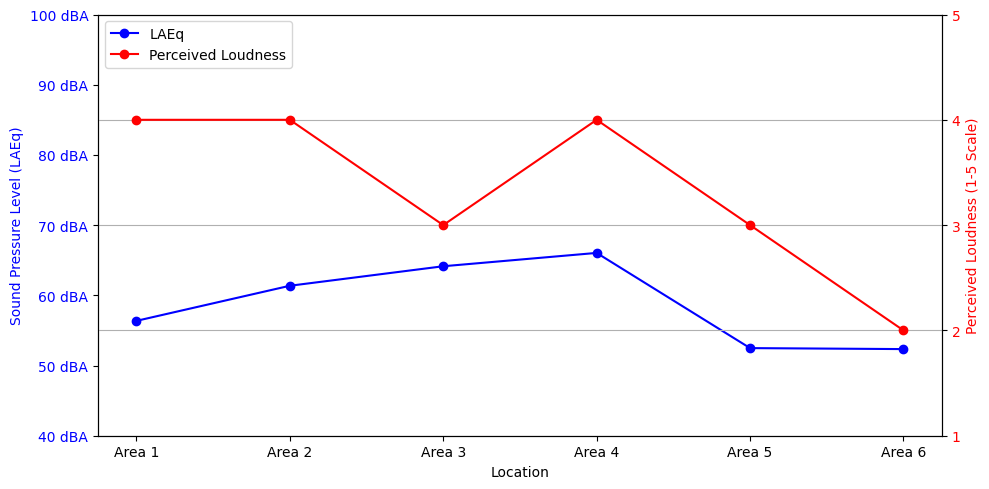

In [3]:
# 1.5. Plot SPL and perceived loudness
# Alvaro Balderrama Chiappe
231026

import matplotlib.pyplot as plt
import numpy as np

# Define the areas and their corresponding LAEq and Perceived Loudness values
areas = ['Area 1', 'Area 2', 'Area 3', 'Area 4', 'Area 5', 'Area 6']

# Example data for LAEq and Perceived Loudness (you should replace with your own data)
LAEq_values = [56.36, 61.36, 64.14, 66.04, 52.48, 52.34]
perceived_loudness_values = [4, 4, 3, 4, 3, 2]

# Create the line graph with a dual y-axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot LAEq values as a line on the left y-axis
ax1.plot(areas, LAEq_values, marker='o', label='LAEq', color='b')
ax1.set_xlabel('Location')
ax1.set_ylabel('Sound Pressure Level (LAEq)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis on the right for Perceived Loudness
ax2 = ax1.twinx()
ax2.plot(areas, perceived_loudness_values, marker='o', label='Perceived Loudness', color='r')
ax2.set_ylabel('Perceived Loudness (1-5 Scale)', color='r')

# Customize the plot
#plt.title('LAEq and Perceived Loudness in Different Areas')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Set y-axis ticks and labels for the left y-axis
ax1.set_yticks(np.arange(40, 101, 10))
ax1.set_yticklabels([f'{i} dBA' for i in range(40, 101, 10)])

# Set y-axis ticks and labels for the right y-axis and make them red
ax2.set_yticks([1, 2, 3, 4, 5])
ax2.set_yticklabels([1, 2, 3, 4, 5], color='r')

# Show the legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Show the plot
plt.grid(True)  # Add grid lines
plt.tight_layout()  # Adjust the layout for better appearance
plt.show()


In [6]:
#2. Sociodemographic data
# Alvaro Balderrama Chiappe
231026

# Define the number of males, females, and non-conforming individuals
male_count = 2
female_count = 5
non_conforming_count = 0
rather_not_say_count = 0

# Define a list of ages
age_list = [24, 26, 26, 26, 28, 36]  # Enter the ages in the list

# Define a list of nationalities
nationality_list = ["Turkey", "Iran", "Sri Lanka", "Germany", "India", "India", "Iran"]  # Enter the nationalities in the list

# Define the number of students and employed individuals
students_count = 7
employed_count = 1

# Define the number of individuals with a University - Bachelor's degree or similar education
education_count = 7

# Calculate the average age (without decimal points)
average_age = sum(age_list) // len(age_list)

# Calculate the total count
total_count = male_count + female_count + non_conforming_count + rather_not_say_count

# Calculate percentage of each gender group
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100
non_conforming_percentage = (non_conforming_count / total_count) * 100
rather_not_say_percentage = (rather_not_say_count / total_count) * 100

# Calculate the average number of nationalities
average_nationalities = len(nationality_list)

# Calculate percentage of students and employed individuals
students_percentage = (students_count / total_count) * 100
employed_percentage = (employed_count / total_count) * 100

# Calculate percentage of individuals with University - Bachelor's degree or similar education
education_percentage = (education_count / total_count) * 100

# Calculate the percentage of each nationality
nationality_percentages = {}
for nationality in nationality_list:
    nationality_count = nationality_list.count(nationality)
    percentage = (nationality_count / total_count) * 100
    nationality_percentages[nationality] = percentage

# Sort the nationality percentages from major to minor
sorted_nationality_percentages = sorted(nationality_percentages.items(), key=lambda x: x[1], reverse=True)

# Sort the nationalities alphabetically
# sorted_nationality_percentages = sorted(sorted_nationality_percentages, key=lambda x: x[0])

# Print the results
print("Sociodemographic Data:")
print(f"Average Age: {average_age}")
print(f"Gender Distribution:")
print(f"  - Female: {female_percentage:.2f}%")
print(f"  - Male: {male_percentage:.2f}%")
print(f"  - Non-Conforming: {non_conforming_percentage:.2f}%")
print(f"  - Rather Not Say: {rather_not_say_percentage:.2f}%")
print(f"Country/Nationality:")
for nationality, percentage in sorted_nationality_percentages:
    print(f"  - {nationality}: {percentage:.2f}%")
print(f"Occupation:")
print(f"  - Students: {students_percentage:.2f}%")
print(f"  - Employed: {employed_percentage:.2f}%")
print(f"Education:")
print(f"  - University - Bachelor's degree or similar: {education_percentage:.2f}%")


Sociodemographic Data:
Average Age: 27
Gender Distribution:
  - Female: 71.43%
  - Male: 28.57%
  - Non-Conforming: 0.00%
  - Rather Not Say: 0.00%
Country/Nationality:
  - Iran: 28.57%
  - India: 28.57%
  - Turkey: 14.29%
  - Sri Lanka: 14.29%
  - Germany: 14.29%
Occupation:
  - Students: 100.00%
  - Employed: 14.29%
Education:
  - University - Bachelor's degree or similar: 100.00%


C:\Users\alvar\AppData\Local\Temp\ipykernel_6624\2655281555.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


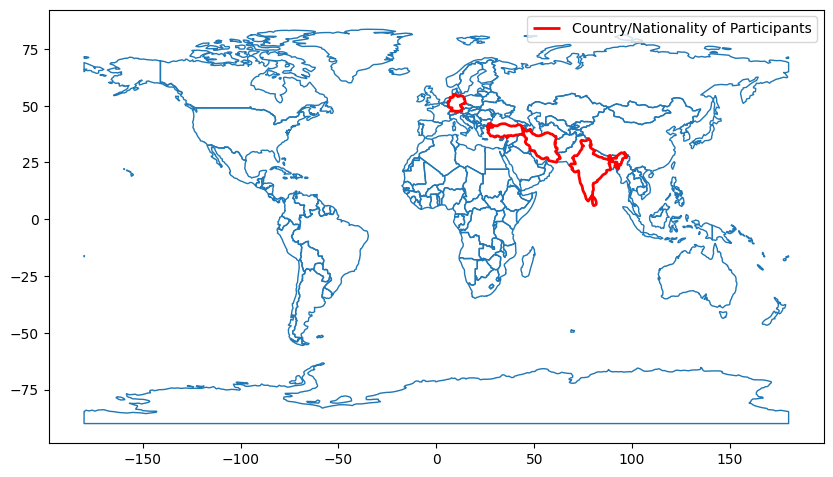

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Define the ISO country codes of the countries you want to highlight
highlighted_countries = ["TUR", "IRN", "LKA", "DEU", "IND"]

# Load the world shapefile (or GeoJSON)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the countries to be highlighted
highlighted_world = world[world['iso_a3'].isin(highlighted_countries)]

# Create subplots for the world map and the highlighted countries
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot the world map
world.boundary.plot(ax=ax, linewidth=1)

# Plot the highlighted countries with a different color
highlighted_world.boundary.plot(ax=ax, linewidth=2, color='red', label='Country/Nationality of Participants')

# Customize the plot
# plt.title('Highlighted Countries on World Map')
plt.legend()

plt.show()
